# Homework 3

Unzip the zip file that contains the homework and the data associated with it, then run the code below:

In [1]:
import os
import sys
import hashlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

assert os.path.exists('../homeworks/HW3.ipynb')
assert os.path.exists('../data/hw3-task2-data.csv')
assert os.path.exists('../data/BreastTissue.xlsx')


## Task 1

Run the code below before you start working on your homework:


In [2]:
info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/'+name,'w') as f:
    f.write(info)

In [3]:
with open('../other/'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/'+name)

## Task 2

Using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function read the data file '`data/hw3-task2-data.csv`' below:

In [4]:
task2_data =pd.read_csv("../data/hw3-task2-data.csv") # <- YOUR CODE GOES HERE
task2_data.head(10)

,x,y,c
1,-2.873979,-1.977563,0
2,-1.939798,-2.758217,0
3,-1.954560,2.657385,0
4,-3.284104,1.952121,0
5,-1.954758,2.351581,0
6,-1.133108,2.649699,0
7,-0.063933,-2.703307,0
8,2.272370,-1.921207,0
9,2.627003,-2.284012,0
10,1.695585,-3.618690,0


Now, using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `sklearn`, create training and testing data subsets. Use 25% of your data as test, and remaining as your training data sets.

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(task2_data.iloc[:,0:2],task2_data.iloc[:,2],test_size=0.25)# <- YOUR CODE GOES HERE

Now, using [`sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) create a k-means model below for 2 clusters, train it and use the test dataset to make predictions:

In [6]:
model = KMeans(n_clusters=2) # <- YOUR CODE GOES HERE
model.fit(Xtrain) # <- YOUR CODE SHOULD REPLACE ?????
predictions = model.predict(Xtest) # <- YOUR CODE GOES HERE

Now, using [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) construct the confusion matrix, and calculate your accuracy using sklearn's [cross-validation tools](http://scikit-learn.org/stable/modules/model_evaluation.html).  Try to repeat your experiments until you reach a reasonable accuracy result.

In [7]:
cm = confusion_matrix(Ytest,predictions) # <- YOUR CONFUSION MATRIX CODE GOES HERE
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Ytest,predictions)# <- YOUR ACCURACY CODE GOES HERE
print(cm)
accuracy

[[65 60]
 [57 56]]


0.5084033613445378

As you observed, your accuracy is really terrible.  Inspect the data, make a plot and observe that k-means **will never** produce a usable estimate of clusters for this dataset:

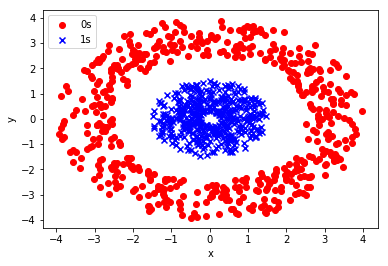

In [8]:
## Do your inspections and plots in this cell
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(task2_data.iloc[:500, 0], task2_data.iloc[:500, 1],color='red', marker='o', label='0s')
plt.scatter(task2_data.iloc[500:950, 0], task2_data.iloc[500:950, 1],color='blue', marker='x', label='1s')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

In this cell, write an explanation as to why the k-means algorithm will never work:

### Your explanation goes below

K-means works with the idea of centroid so that their centroids are very close and model does not work..

## Task 3

Now, instead of using k-means model, let us use a k-nn model.  Below, using [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) create a model, train it and use the test dataset to make predictions.  Use the same train-test datasets we created earlier.  You are free to choose the parameters 'k' and the 'metric':

In [10]:
model = KNeighborsClassifier(n_neighbors=2,metric="minkowski")
model.fit(Xtrain,Ytrain) # <- YOUR CODE SHOULD REPLACE ?????
predictions = model.predict(Xtest)  # <- YOUR CODE GOES HERE

Now, construct the confusion matrix, and calculate your accuracy.

In [11]:
cm = confusion_matrix(Ytest,predictions) # <- YOUR CONFUSION MATRIX CODE GOES HERE
accuracy =accuracy_score(Ytest,predictions) # <- YOUR ACCURACY CODE GOES HERE
accuracy

1.0

Accuracy is much better. Explain below why, in theory, this method does produce better results in this case:

### Your explanation goes below

İdea of knn which Points are belonged to (according the choosen metric) nearest class so beside of kmeans we can easily see that it will be more accurate 

## Task 4

Using [`pandas.read_excel`]() read the [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx'

In [12]:
data = pd.read_excel("../data/BreastTissue.xlsx") # your code goes here
data.head(10)
xs = data.iloc[:,1:]
ys = data.iloc[:,0]

Now, create a k-nn model, train and test it. Your dependent variable is `Class` column. You are free to choose `k` and the `metric`:

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs,ys,test_size=0.25)# CODE GOES HERE

In [14]:
model = KNeighborsClassifier(n_neighbors=5,metric="euclidean")
model.fit(Xtrain,Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted)
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[6 0 0 0 0 0]
 [0 3 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 2 4 1]
 [0 0 0 0 1 2]
 [0 1 0 0 1 2]]
0.5555555555555556


Now, using [feature scaling](http://scikit-learn.org/stable/modules/preprocessing.html), specifically, using [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) normalize the feature columns `xs` we defined earlier below:

In [15]:
scaler = StandardScaler()
scaler.fit(xs)
xs =  scaler.transform(xs)# your code goes here

Now, repeat mdoel construction, training, testing and accuracy calculation

In [16]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs,ys,test_size=0.25)
model = KNeighborsClassifier(n_neighbors=6,metric="euclidean")
model.fit(Xtrain,Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted)
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[6 0 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 4 1]
 [0 0 0 0 2 0]
 [0 1 0 0 2 1]]
0.7037037037037037


Why did we get better results? Explain below:

### Your explanation goes below

Somevalues can be dominant so if we remove the standard deviation and get the same range like (0<i<1) ,they will show real impact on output and we can do better predictions like that above

## Task 5

Now, construct a k-nn model for the same dataset [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx' first using the original data, then again, using feature scaling. At the end compare accuracies.

In [17]:
## Your code goes here

In [18]:
data=pd.read_excel("../data/BreastTissue.xlsx")
data.head()
data.iloc[:,1:10].head()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=0.5)
model=KMeans(n_clusters=6)
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
labels = {"car":0, "fad":1, "mas":2,"gla":3,"con":4,"adi":5}
real = Ytest.map(lambda x: labels[x])
cm=confusion_matrix(real,predicted)
accuracy=accuracy_score(real,predicted)
print(cm)
print(accuracy)

[[ 4  0  1  0  3  2]
 [ 0  0  0  0  0  8]
 [ 0  0  0  0  0 11]
 [ 0  0  0  0  0  5]
 [ 4  0  0  0  1  3]
 [ 1  0  3  6  0  1]]
0.11320754716981132


In [20]:
x=data.iloc[:,1:]
y=data.iloc[:,0]
scaler = StandardScaler()
scaler.fit(x)
x =  scaler.transform(x)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.5)
model=KMeans(n_clusters=6)
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
labels = {"car":0, "fad":1, "mas":2,"gla":3,"con":4,"adi":5}
real = Ytest.map(lambda x: labels[x])
cm=confusion_matrix(real,predicted)
accuracy=accuracy_score(real,predicted)
print(cm)
print(accuracy)

[[ 2  0  8  0  0  0]
 [ 8  0  0  0  0  0]
 [10  0  1  0  0  0]
 [ 7  0  0  0  0  0]
 [ 4  0  0  3  0  0]
 [ 0  5  0  1  4  0]]
0.05660377358490566


In [30]:
withoutscaling=[]
data=pd.read_excel("../data/BreastTissue.xlsx")
for i in range(10):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=0.5)
    model=KMeans(n_clusters=6)
    model.fit(Xtrain,Ytrain)
    predicted=model.predict(Xtest)
    labels = {"car":0, "fad":1, "mas":2,"gla":3,"con":4,"adi":5}
    real = Ytest.map(lambda x: labels[x])
    cm=confusion_matrix(real,predicted)
    accuracy=accuracy_score(real,predicted)
    withoutscaling=withoutscaling +[accuracy]

print(cm)
print(accuracy)

[[3 0 0 3 6 0]
 [9 0 0 0 0 0]
 [6 0 0 0 1 0]
 [8 0 0 0 0 0]
 [1 1 0 1 2 0]
 [1 2 2 2 1 4]]
0.16981132075471697


In [31]:
withscaling=[]
data=pd.read_excel("../data/BreastTissue.xlsx")
for i in range(10):
    x=data.iloc[:,1:]
    y=data.iloc[:,0]
    scaler = StandardScaler()
    scaler.fit(x)
    x =  scaler.transform(x)
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.5)
    model=KMeans(n_clusters=6)
    model.fit(Xtrain)
    predicted=model.predict(Xtest)
    labels = {"car":0, "fad":1, "mas":2,"gla":3,"con":4,"adi":5}
    real = Ytest.map(lambda x: labels[x])
    cm=confusion_matrix(real,predicted)
    accuracy=accuracy_score(real,predicted)
    withscaling=withscaling+ [accuracy]
print(cm)
print(accuracy)

[[0 4 0 7 0 0]
 [0 1 0 0 0 5]
 [0 5 0 0 0 5]
 [0 7 0 0 0 1]
 [1 0 3 0 0 3]
 [5 0 1 0 5 0]]
0.018867924528301886


Approximately Percentage of average accuracy: 0.9801893022232007


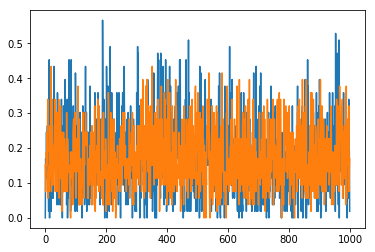

In [32]:
import numpy as np
plt.plot(withscaling)
plt.plot(withoutscaling)
print("Approximately Percentage of average accuracy:",np.mean(withscaling)/np.mean(withoutscaling))
print("1000 trial")
plt.show()

İn the graph we can see that there is no meaningful movement so it doesn't matter if we didn't use right algorithm there is no impact of scaling .